In [2]:
import numpy as np
from numpy import fft
import pandas as pd
import re, os, path, csv
import glob

import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.insert(0, r'C:\Users\shadd\OneDrive\Documents\Python\frxas.py')

from frxas import time_domain, models, hdf5_io
%reload_ext autoreload
%autoreload 2

In [3]:
np.log10(800e-9)

-6.096910013008056

In [4]:
def sort_func(all_files):
    return int(all_files.split('\\E')[-1][:-4])

In [5]:
direc = r'E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\'
freq_in = 0.5
ROhm = 27.8
step = 50
ang = -90

Ir_avgs = []
for E in range(83, 84):
    ti, V, J, Ir, Io, If, Eta = [], [], [], [], [], [], []
    Ir_adj, J_adj, V_adj, Eta_adj = [], [], [], []
    Ir_adj_fit, J_adj_fit, V_adj_fit, Eta_adj_fit = [], [], [], []
    match_str = f'E{E}.txt'
    print(direc+match_str)
    ti, V, J, Ir, Io, If = time_domain.extract_data(direc, match_str,skip_head=0, sort_func=sort_func, end=2, xray_disp=False, xray_raw=True)
    ti = ti[::step]
    # Reversing V and J because the BioLogic SP-150 inverts these
    V = -V[::step]
    J = -J[::step]
    Ir = Ir[::step]
    Io = Io[::step]
    If = If[::step]
    print('Finished reading data')
    b = 0.1 * freq_in * (ti[-1]+ti[1])
    Eta = V - J * ROhm
    print('Phase align Ir')
    Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, Eta, Ir, freq_in, b, phase=ang)
    print('Phase align J')
    J_adj, J_adj_fit = time_domain.phase_align(ti, Eta, J, freq_in, b, phase=ang)
    print('Phase align V')
    V_adj, V_adj_fit = time_domain.phase_align(ti, Eta, V, freq_in, b, phase=ang)
    print('Phase align Eta')
    Eta_adj, Eta_adj_fit = time_domain.phase_align(ti, Eta, Eta, freq_in, b, phase=ang)

    Z = (V_adj_fit.params['h1_re_comp'].value + 1j* V_adj_fit.params['h1_im_comp'].value) / (J_adj_fit.params['h1_re_comp'].value + 1j*J_adj_fit.params['h1_im_comp'].value)
    print(f' Z: {Z}')
    print('Save fits')

#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\{str(match_str[:-4])}_EtaAlign_Ir2', Ir_adj_fit)
#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\{str(match_str[:-4])}_EtaAlign_J2', J_adj_fit)
#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\{str(match_str[:-4])}_EtaAlign_V2', V_adj_fit)
#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\{str(match_str[:-4])}_EtaAlign_Eta2', Eta_adj_fit)
    Ir_avgs.append(np.mean(If/Io))
    
win = time_domain.gauss_window(np.ones(ti.shape), freq_in, ti, b)

E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\E83.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
 Z: (37.598431302318865-14.752220439233453j)
Save fits


In [6]:
np.angle(37.598-14.75*1j, deg=True)

-21.420479436898233

In [13]:
step = 50
s = 10.55
e = 22.55

st = int(s * 1000)
end = int(e * 1000)
t_st = int(0 * 1000)
t_end = int((e-s) * 1000)

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 8}

mpl.rc('font', **font)

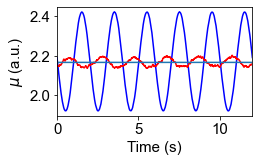

In [8]:
_, ax = plt.subplots(figsize=(3.5,2))

ax.plot(ti[t_st:t_end], V[st:end]+Ir_avgs, c = (0,0,1))
ax.plot(ti[t_st:t_end], If[st:end] / Io[st:end], c = (1,0,0))
ax.plot(ti[t_st:t_end], np.mean(If[st:end] / Io[st:end]) * np.ones(np.shape(If[st:end])))

# ax.plot(ti[t_st:t_end], win[t_st:t_end])

ax.set_xlim(0, e-s)
ax.set_xlabel('Time (s)')
ax.set_ylabel('$\mu$ (a.u.)')

# ax.set_xticklabels(fontsize=14)
# plt.savefig('Plots/Raw_Ir_0.5Hz_E83.png', bbox_inches='tight', dpi=300)
plt.show()

(-0.41288562555942065, 0.6568418069168875)


C:\Users\shadd\Anaconda3\envs\UW\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


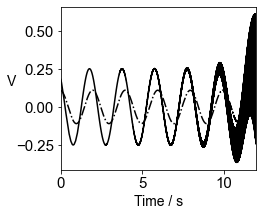

In [9]:
_, ax = plt.subplots(figsize=(3.5,3))

ax.plot(ti[t_st:t_end], V_adj[st:end].real / win[st:end], c = (0,0,0))
ax.plot(ti[t_st:t_end], Eta_adj[st:end]/ win[st:end], 'k-.')

# ax.plot(ti[t_st:t_end], win[t_st:t_end])

ax.set_xlim(0, e-s)
ax.set_xlabel('Time / s', fontsize=14)
ax.set_ylabel('V', fontsize=14, rotation=0)
# ax.set_xticklabels(fontsize=14)
# plt.savefig('Plots/Raw_V_0.5Hz_E83.png', bbox_inches='tight', dpi=300)
print(plt.ylim())
plt.show()

In [10]:
from matplotlib.ticker import FormatStrFormatter

(2.1440020587035145, 2.2135262258390527)


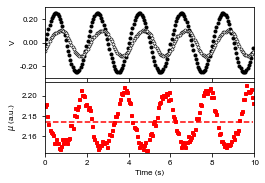

In [25]:
step = 55
s = 23.56
e = 33.56

st = int(s * 1000)
end = int(e * 1000)
t_st = int(0 * 1000)
t_end = int((e-s) * 1000)

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 8}

mpl.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(3.75,2.679))

ax1.plot(ti[t_st:t_end:step], V[st:end:step], 'ko', ms=3,  label ='V')
ax1.plot(ti[t_st:t_end:step], Eta[st:end:step], 'ko', ms=3, mfc=(1,1,1), mew=0.6, label='$\eta$')
# ax1.axhline(0, c='black', lw=1)
# ax1.plot([0, e-s], [0,0], 'k-', lw=.75)
# ax1.plot(ti[t_st:t_end:step], J[st:end:step]*50)

ax1.set_xlim(0, e-s)
ax1.set_ylim(-.3,.3)
ax1.set_ylabel('V')
ax1.set_xticklabels([])
# ax1.set_yticks([-.30,-.15,0,.15,.3])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

ax2.plot(ti[t_st:t_end:step], If[st:end:step]/Io[st:end:step], 'rs', ms=3)
ax2.plot(ti[t_st:t_end:step], np.mean(If[st:end]/Io[st:end]) * np.ones(np.shape(If[st:end:step])) ,'r--')

ax2.set_xlim(0, e-s)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$\mu$ (a.u.)')
# ax.plot(ti[t_st:t_end], win[t_st:t_end])
plt.subplots_adjust(hspace=0.05)

# ax.set_xticklabels(fontsize=14)
plt.savefig('Plots/Raw_V_u_Eta_0.5Hz_E83_3.svg', bbox_inches='tight')
print(plt.ylim())
plt.show()

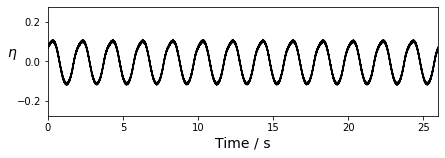

In [230]:
_, ax = plt.subplots(figsize=(7,2))

ax.plot(ti[t_st:t_end], Eta[st:end], c = (0,0,0))


# ax.plot(ti[t_st:t_end], win[t_st:t_end])

ax.set_xlim(0, e-s)
ax.set_ylim(-0.27524685631333334, 0.2752349436866666)
ax.set_xlabel('Time / s', fontsize=14)
ax.set_ylabel('$\eta$', fontsize=14, rotation=0)
# ax.set_xticklabels(fontsize=14)
plt.savefig('Plots/Raw_Eta_0.5Hz_E83.png', bbox_inches='tight', dpi=300)
plt.show()

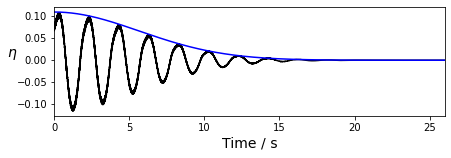

In [232]:
Eta_win = time_domain.gauss_window(Eta, 0.5, ti, 4)
win = time_domain.gauss_window(np.ones(ti.shape), 0.5, ti, 4) * np.max(Eta)

_, ax = plt.subplots(figsize=(7,2))

ax.plot(ti, Eta_win, c = (0,0,0))
ax.plot(ti, win, c = (0,0,1))
# ax.plot(ti, -win, c = (0,0,1))

# ax.plot(ti[t_st:t_end], win[t_st:t_end])

ax.set_xlim(0, e-s)
ax.set_xlabel('Time / s', fontsize=14)
ax.set_ylabel('$\eta$', fontsize=14, rotation=0)

plt.savefig('Plots/Eta_Window_0.5Hz_E83.png', bbox_inches='tight', dpi=300)
plt.show()

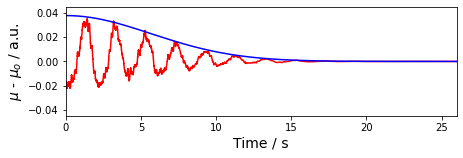

In [236]:
Ir_win = time_domain.gauss_window(Ir[st:end], 0.5, ti[t_st:t_end], 4)
win = time_domain.gauss_window(np.ones(ti.shape), 0.5, ti, 4) * np.max(Ir[st:end]*.85)

_, ax = plt.subplots(figsize=(7,2))

ax.plot(ti[t_st:t_end], Ir_win, c = (1,0,0))
ax.plot(ti, win, c = (0,0,1))

# ax.plot(ti[t_st:t_end], win[t_st:t_end])

ax.set_xlim(0, e-s)
ax.set_ylim(-.045, .045)
ax.set_xlabel('Time / s', fontsize=14)
ax.set_ylabel('$\mu$ - $\mu_o$ / a.u.', fontsize=14)

# ax.set_xticklabels(fontsize=14)
plt.savefig('Plots/Ir_Window_0.5Hz_E83.png', bbox_inches='tight', dpi=300)
plt.show()

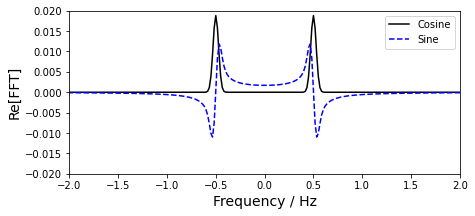

In [178]:
cos_fft = time_domain.get_windowed_fft(ti, np.cos(2*np.pi*.5*ti), 0.5, 4)
sin_fft = time_domain.get_windowed_fft(ti, np.sin(2*np.pi*.5*ti), 0.5, 4)
freqs = np.fft.fftshift(np.fft.fftfreq(len(ti), d=ti[1]))

_, ax = plt.subplots(figsize=(7,3))

ax.plot(freqs, cos_fft.real, 'k-', label='Cosine')
ax.plot(freqs, sin_fft.real, 'b--', label='Sine')

ax.set_xlim(-2, 2)
ax.set_ylim(-.02, .02)

ax.set_xlabel('Frequency / Hz', fontsize=14)
ax.set_ylabel('Re[FFT]', fontsize=14)
ax.legend()
# ax.set_xticklabels(fontsize=14)
# plt.savefig('Plots/Cos_FFT_Re.png', bbox_inches='tight', dpi=300)
plt.savefig('Plots/Cos_Sin_FFT_Re.png', bbox_inches='tight', dpi=300)
plt.show()

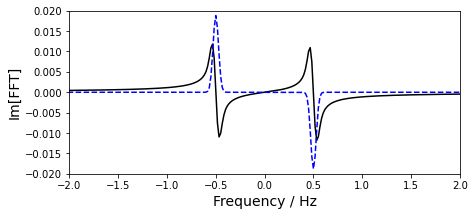

In [182]:
cos_fft = time_domain.get_windowed_fft(ti, np.cos(2*np.pi*.5*ti), 0.5, 4)
sin_fft = time_domain.get_windowed_fft(ti, np.sin(2*np.pi*.5*ti), 0.5, 4)
freqs = np.fft.fftshift(np.fft.fftfreq(len(ti), d=ti[1]))

_, ax = plt.subplots(figsize=(7,3))

ax.plot(freqs, cos_fft.imag, 'k-', label='Cosine')
ax.plot(freqs, sin_fft.imag, 'b--', label='Sine')

ax.set_xlim(-2, 2)
ax.set_ylim(-.02, .02)
ax.set_xlabel('Frequency / Hz', fontsize=14)
ax.set_ylabel('Im[FFT]', fontsize=14)
# ax.legend()

# plt.savefig('Plots/Cos_FFT_Im.png', bbox_inches='tight', dpi=300)
plt.savefig('Plots/Cos_Sin_FFT_Im.png', bbox_inches='tight', dpi=300)
plt.show()

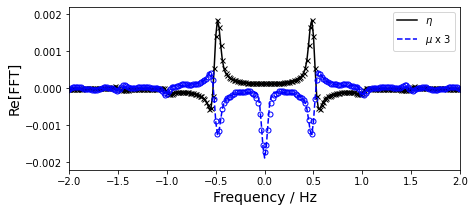

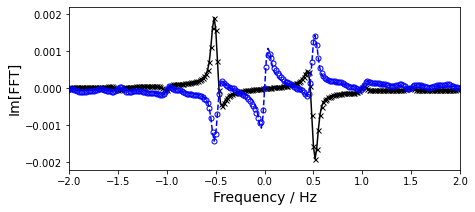

In [240]:
freqs = np.fft.fftshift(np.fft.fftfreq(len(ti), d=ti[1]))

Eta_fft = time_domain.get_windowed_fft(ti, Eta, 0.5, 4)
Eta_fft_fit = time_domain.fit_windowed_fft(freqs, Eta_fft, 0.5, 4, harmonics=3)
Ir_fft = time_domain.get_windowed_fft(ti, Ir, 0.5, 4)
Ir_fft_fit = time_domain.fit_windowed_fft(freqs, Ir_fft, 0.5, 4, harmonics=3)


_, ax = plt.subplots(figsize=(7,3))

ax.plot(freqs, Eta_fft.real, 'kx', ms=5)
ax.plot(freqs, Eta_fft_fit.eval().real, 'k-', label ='$\eta$')
ax.plot(freqs, Ir_fft.real*3, 'bo', ms=5, fillstyle='none')
ax.plot(freqs, Ir_fft_fit.eval().real*3, 'b--', label ='$\mu$ x 3')

ax.set_xlim(-2, 2)
ax.set_ylim(-.0022, .0022)
ax.set_xlabel('Frequency / Hz', fontsize=14)
ax.set_ylabel('Re[FFT]', fontsize=14)
ax.legend()

# plt.savefig('Plots/Eta_FFT_Re.png', bbox_inches='tight', dpi=300)
plt.savefig('Plots/Eta_Ir_FFT_Re.png', bbox_inches='tight', dpi=300)
plt.show()

_, ax = plt.subplots(figsize=(7,3))

ax.plot(freqs, Eta_fft.imag, 'kx', ms=5)
ax.plot(freqs, Eta_fft_fit.eval().imag, 'k-', label ='$\eta$')
ax.plot(freqs, Ir_fft.imag*3, 'bo', ms=5, fillstyle='none')
ax.plot(freqs, Ir_fft_fit.eval().imag*3, 'b--', label ='$\mu$ x 3')

ax.set_xlim(-2, 2)
ax.set_ylim(-.0022, .0022)
ax.set_xlabel('Frequency / Hz', fontsize=14)
ax.set_ylabel('Im[FFT]', fontsize=14)

# plt.savefig('Plots/Eta_FFT_Im.png', bbox_inches='tight', dpi=300)
plt.savefig('Plots/Eta_Ir_FFT_Im.png', bbox_inches='tight', dpi=300)

plt.show()

In [222]:
direc = r'E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\'
freq_in = 0.5
ROhm = 27.8
step = 50
ang = -90

ti, V, J, Ir, Io, If = time_domain.extract_data(direc, match_str,skip_head=0,
                                                sort_func=sort_func, end=2,
                                                xray_disp=False, xray_raw=True)
b = 0.1 * freq_in * (ti[-1]+ti[1])
Eta = V - J * ROhm
print('Phase align Ir')
Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, Eta, Ir, freq_in, b, phase=ang)
print('Phase align J')
J_adj, J_adj_fit = time_domain.phase_align(ti, Eta, J, freq_in, b, phase=ang)
print('Phase align V')
V_adj, V_adj_fit = time_domain.phase_align(ti, Eta, V, freq_in, b, phase=ang)
print('Phase align Eta')
Eta_adj, Eta_adj_fit = time_domain.phase_align(ti, Eta, Eta, freq_in, b, phase=ang)

E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\E83.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
 Z: (37.598431302318865-14.752220439233453j)
Save fits


In [241]:
_, Ir_fit_adj = time_domain.phase_align(ti, Eta, Ir, 0.5, 4, phase=-90, harmonics=3)
_, Eta_fit_adj = time_domain.phase_align(ti, Eta, Eta, 0.5, 4, phase=-90, harmonics=3)

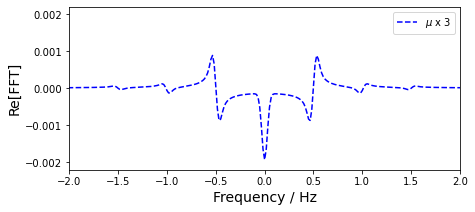

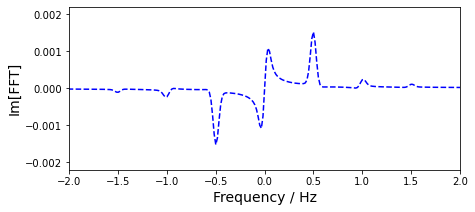

In [244]:
_, ax = plt.subplots(figsize=(7,3))

# ax.plot(freqs, Eta_fit_adj.eval().real, 'k-', label ='$\eta$')
ax.plot(freqs, Ir_fit_adj.eval().real*3, 'b--', label ='$\mu$ x 3')

ax.set_xlim(-2, 2)
ax.set_ylim(-.0022, .0022)
ax.set_xlabel('Frequency / Hz', fontsize=14)
ax.set_ylabel('Re[FFT]', fontsize=14)
ax.legend()

# plt.savefig('Plots/Eta_FFTadj_Re.png', bbox_inches='tight', dpi=300)
plt.savefig('Plots/Ir_FFTadj_Re.png', bbox_inches='tight', dpi=300)
plt.show()

_, ax = plt.subplots(figsize=(7,3))

# ax.plot(freqs, Eta_fit_adj.eval().imag, 'k-', label ='$\eta$')
ax.plot(freqs, Ir_fit_adj.eval().imag*3, 'b--', label ='$\mu$ x 3')

ax.set_xlim(-2, 2)
ax.set_ylim(-.0022, .0022)
ax.set_xlabel('Frequency / Hz', fontsize=14)
ax.set_ylabel('Im[FFT]', fontsize=14)

# plt.savefig('Plots/Eta_FFTadj_Im.png', bbox_inches='tight', dpi=300)
plt.savefig('Plots/Ir_FFTadj_Im.png', bbox_inches='tight', dpi=300)

plt.show()

In [162]:
Ns = int(Ir_adj_fit.ndata/2)
dt = 1/(Ir_adj_fit.userkws['frequencies'][0]*-2)
freq_in = Ir_adj_fit.userkws['freq_in']
b = Ir_adj_fit.userkws['window_param']
ti = np.linspace(0, dt*(Ns-1),num=Ns)
Ns_wfm = int(100/freq_in/dt)
Ir_adj = fft.ifft(fft.ifftshift(Ir_adj_fit.eval()*(Ns*np.pi)))
Eta_adj = fft.ifft(fft.ifftshift(Eta_adj_fit.eval()*(Ns*np.pi)))
V_adj = fft.ifft(fft.ifftshift(V_adj_fit.eval()*(Ns*np.pi)))
J_adj = fft.ifft(fft.ifftshift(J_adj_fit.eval()*(Ns*np.pi)))
window = time_domain.gauss_window(np.ones(Ns), freq_in, ti, b)
ti = ti[:Ns_wfm]
Ir_adj = Ir_adj[:Ns_wfm]/window[:Ns_wfm]
Eta_adj = Eta_adj[:Ns_wfm]/window[:Ns_wfm]
Ir_actual = Ir_adj[:Ns_wfm]/window[:Ns_wfm] + np.mean(If/ Io)

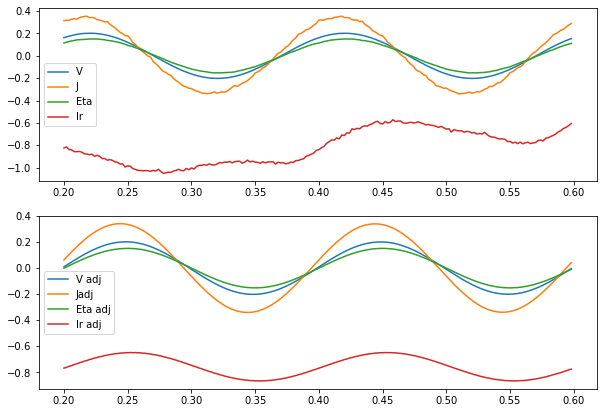

In [163]:
_, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,7))
st = int(0.2 * 50000/step)
end = int(0.6 * 50000/step)

ax1.plot(ti[st:end], V[st:end].real, label = 'V')
ax1.plot(ti[st:end], J[st:end].real*100, label = 'J')
ax1.plot(ti[st:end], Eta[st:end].real, label = 'Eta')
ax1.plot(ti[st:end], Ir[st:end].real*50, label ='Ir')

ax2.plot(ti[st:end], V_adj[st:end].real, label = 'V adj')
ax2.plot(ti[st:end], J_adj[st:end].real*100, label = 'Jadj')
ax2.plot(ti[st:end], Eta_adj[st:end].real, label = 'Eta adj')
ax2.plot(ti[st:end], Ir_adj[st:end].real*50, label ='Ir adj')

ax.set_xlim(st/(50000/step), end/(50000/step))
ax1.legend()
ax2.legend()
plt.show()

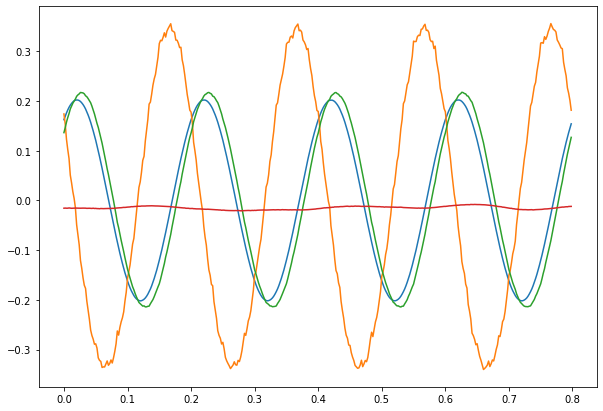

In [112]:
_, ax = plt.subplots(figsize=(10,7))
st = int(0 * 1000)
end = int(0.4 * 1000)

ax.plot(ti[st:end], V[st:end])
ax.plot(ti[st:end], J[st:end]*100)
ax.plot(ti[st:end], Eta[st:end])
ax.plot(ti[st:end], Ir[st:end])

# ax.set_xlim(st/1000, end/1000)
plt.show()

In [33]:
np.angle(Z, deg=True)

-97.94929982092992

(0.0, 2.0)

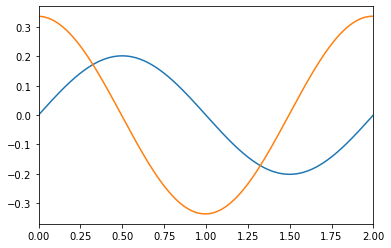

In [58]:
vv = (3.377e-4 - 1j*.202)
jj = (.00337 + 1j* 4.77e-5)

dumV = .5 * (vv * np.exp(1j * np.pi * ti) + np.conj(vv) * np.exp(-1j * np.pi * ti) )
dumJ = .5 * (jj * np.exp(1j * np.pi * ti) + np.conj(jj) * np.exp(-1j * np.pi * ti) )
_, ax = plt.subplots()

ax.plot(ti, dumV.real)
ax.plot(ti, dumJ.real*100)

ax.set_xlim(0, 2)

In [59]:
vv / jj

(-0.748060557484363-59.93006454344451j)

In [51]:
V_adj_fit

In [52]:
J_adj_fit